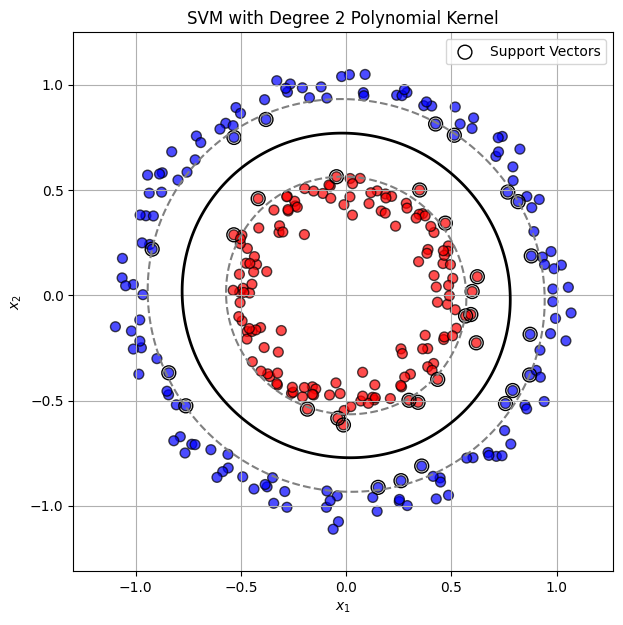

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# 1. Generate Data (Concentric Circles for Non-Linear Separation)
np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Convert labels from (0,1) to (-1,1) for SVM
y = np.where(y == 0, -1, 1)

# 2. Train SVM with Polynomial Kernel (Degree 2, c=0)
clf = SVC(kernel='poly', degree=2, C=1.0, coef0=0, gamma=1)
# scikit uses a complex scaled gamma for the kernels. Here we want to use non-optimal (but simplest!) kernels
# K(x, x') = (x^T x')^2
clf.fit(X, y)

# 3. Create Meshgrid for Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten and Stack Grid for Prediction
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid)
decision = decision.reshape(xx.shape)

# 4. Plot Data Points and Decision Boundary
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Plot Decision Boundary and Margins
plt.contour(xx, yy, decision, levels=[0], linewidths=2, colors='k')
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')

# Highlight Support Vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM with Degree 2 Polynomial Kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.gca().set_aspect('equal')  #  making the plot square
plt.show()



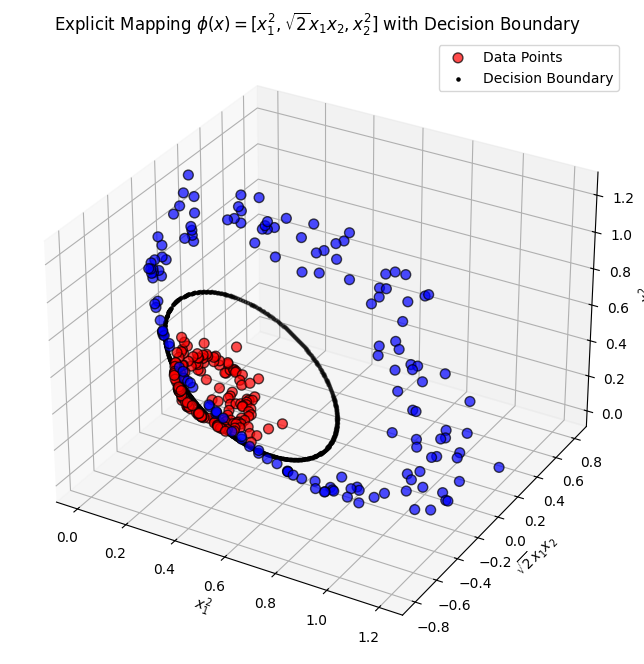

In [5]:

# 3D Plot for phi(x) with Decision Boundary
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 5. Visualize Explicit Mapping phi(x) = [x1^2, sqrt(2) x1 x2, x2^2]

# Apply phi(x) to each point
phi_X = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in X])

# Apply phi(x) to the meshgrid for decision boundary
phi_grid = np.array([[x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2] for x in grid])

# Scatter plot of transformed data
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7, label='Data Points')

# Plot only the decision boundary contour (i.e. where decision == 0)
grid_decision = clf.decision_function(grid)
contour_mask = np.isclose(grid_decision, 0, atol=0.01)  # select points near decision boundary
ax.scatter(phi_grid[contour_mask, 0], phi_grid[contour_mask, 1], phi_grid[contour_mask, 2],
           c='k', s=5, label='Decision Boundary')

# Set axis labels and title for 3D plot
ax.set_title('Explicit Mapping $\phi(x) = [x_1^2, \sqrt{2} x_1 x_2, x_2^2]$ with Decision Boundary')
ax.set_xlabel('$x_1^2$')
ax.set_ylabel('$\sqrt{2} x_1 x_2$')
ax.set_zlabel('$x_2^2$')

# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()


## 1

Rozważmy:
$$
\phi(x) = \begin{bmatrix} x_1^2 \\ \sqrt{2}\,x_1x_2 \\ x_2^2 \end{bmatrix}
$$
dla x':
$$
\phi(x') = \begin{bmatrix} {x'_1}^2 \\ \sqrt{2}\,x'_1x'_2 \\ {x'_2}^2 \end{bmatrix}
$$


1 składowa:
   $$
   x_1^2 \cdot {x'_1}^2 = x_1^2 {x'_1}^2
   $$

2 składowa:
   $$
   \sqrt{2}\,x_1x_2 \cdot \sqrt{2}\,x'_1x'_2 = 2\, x_1x_2\, x'_1x'_2
   $$

3 składowa:
   $$
   x_2^2 \cdot {x'_2}^2 = x_2^2 {x'_2}^2
   $$

czyli mamy:

$$
\langle \phi(x), \phi(x') \rangle = x_1^2 {x'_1}^2 + 2\, x_1x_2\,x'_1x'_2 + x_2^2 {x'_2}^2
$$

inaczej:

$$
\langle \phi(x), \phi(x') \rangle = (x_1x'_1 + x_2x'_2)^2
$$

to jest jądro wielomianowe 2 stopnia, czyli
 $$K\left(x, x^{\prime}\right)=\left(x_1 x'_1+x_2 x'_2\right)^2$$  

Funkcja decyzyjna określa, po której stronie tej granicy znajduje się dany punkt: $$f(x)=\operatorname{sign}\Big(w_1 x_1^2+w_2\sqrt{2}\,x_1 x_2+w_3 x_2^2+b\Big)$$
Czyli liniowy SVM($\phi(x)$) szuka separatora postaci:

$$
w_1\,\phi_1(x) + w_2\,\phi_2(x) + w_3\,\phi_3(x) + b = 0.
$$

czyli w naszym przypadku:

$$
w_1\,x_1^2 + w_2\,\sqrt{2}\,x_1x_2 + w_3\,x_2^2 + b = 0.
$$

Równanie to jest liniowe względem: $\phi_1(x)=x_1^2$, $\phi_2(x)=\sqrt{2}\,x_1x_2$, $\phi_3(x)=x_2^2$ (które stworzyliśmy z początkowych zmiennych).\

Względem pierwotncyh zmiennych $x_1$ i $x_2$ mamy równanie kwadratowe. Niech:
$$
A = w_1,\quad B = w_2\sqrt{2},\quad C = w_3,
$$
czyli:
$$
A\,x_1^2 + B\,x_1x_2 + C\,x_2^2 + b = 0.
$$
To jest to równanie kwadratowe dwóch zmiennych, opisujące krzywe drugiego rzędu,w naszym przypadku elipsę.
Na 3D wykresie mamy 3 osie $\phi_1(x) = x_1^2$, $\phi_2(x) = \sqrt{2}\,x_1x_2$,$\phi_3(x) = x_2^2$ - czyli wszystkie są kwadratowe względem pierwotnych zmiennych. SVM znajduje liniową hiperpłaszczyznę względem $\phi(x)$, a równanie $w_1\,x_1^2 + w_2\,\sqrt{2}\,x_1x_2 + w_3\,x_2^2 + b = 0$ jest liniowe względem $\phi(x)$.  

Nowe współrzędne nie są niezależne, bo mamy:
$$
\phi_1(x)\,\phi_3(x)=\left(\frac{\phi_2(x)}{\sqrt{2}}\right)^2,
$$
czyli
$$
x_1^2 \cdot x_2^2 = \left(x_1x_2\right)^2.
$$

Czyli wszystkie powstałe punkty leżą w dwuwymiarowej przestrzeni, która jest  hiperplaszczyną w przestrzeni 3D, przy tym nie wypełniają hiperplaszczyny, leżąc na krzywej, określonej przez zależność między $\phi_1, \phi_2, \phi_3$.
Dlatego widzimy elipsę lub okrąg na obu wykresach 2D i 3D, a nie hiperplaszczynę.




## 2

 W naszej przestrzeni liniowy SVM szuka separatora określonego równaniem:  
   $$
   w_1\,\phi_1(x) + w_2\,\phi_2(x) + w_3\,\phi_3(x) + b = 0.
   $$  
 czyli:
   $$
w_1\,x_1^2 + w_2\,\sqrt{2}\,x_1x_2 + w_3\,x_2^2 + b = 0.
   $$
czyli mamy liniowe równanie zmiennych $\phi_1(x), \phi_2(x), \phi_3(x)$.

$\phi(x)$ jest nieliniowa względem $x_1, x_2$. Równanie hiperplaszczyny:
   $$
 w_1\,x_1^2 + w_2\,\sqrt{2}\,x_1x_2 + w_3\,x_2^2 + b = 0.
   $$
 Niech:
 $$
   A = w_1,\quad B = w_2\sqrt{2},\quad C = w_3,
   $$
   wtedy:
   $$
   A\,x_1^2 + B\,x_1x_2 + C\,x_2^2 + b = 0.
   $$
Kiedy rzutujemy liniową hiperplaszczynę mamy równanie kwadratowe dwóch zmiennych, które opisuje krzywą w przestrzeni 2D, dlatego na wykresie rzutu widzimy elipsę, a nie prostą.
